In [1]:
from fileData import *
from netEnv import *
code_path = ".."

In [2]:
requiredFields = ['FileCount', 'AvgFileSize', 'BufSize', 'Bandwidth', 'AvgRtt', 'CC_Level', 'P_Level', 'PP_Level',
                  'numActiveCores', 'frequency', 'TotalAvgTput', 'TotalEnergy', 'DataTransferEnergy']
LabelName = 'TotalAvgTput'
fileData_chameleon = ReadFile(code_path + '/Dataset/Chameleon_Combined_all.csv', requiredFields)

In [3]:
from fileData import *
optimal_throughput_dictionary_chameleon = fileData_chameleon.return_map_for_tuple_to_throughput()
filedata_grouped_df = fileData_chameleon.get_grouped_df()
filedata_keys=[key for key, _ in filedata_grouped_df]
a_group=filedata_grouped_df.get_group(filedata_keys[1])

In [4]:
print(len(fileData_chameleon.group_keys))

38


In [5]:
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[:],0)

In [6]:
print(len(environmentG1.return_global_action_list()))
print(len(environmentG1.action_list))

173
771


In [7]:
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:2])

In [8]:
print(env.reset())
print(env.states)

[32.        34.9238114 40.        10.        40.        16.
  1.         8.       ]
[[32, 34.9238114, 40, 10, 40, 16, 1, 8], [32, 34.9238114, 40, 10, 40, 16, 1, 16], [32, 34.9238114, 40, 10, 40, 32, 1, 4], [32, 34.9238114, 40, 10, 40, 32, 1, 8]]


In [9]:
from dqnAgent import *
import time
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:2],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:2])
env.reset()
agent=DQNAgent(env,EPSILON_DECAY=40000)
t = time.time()
agent.warming_replay_buffer()
print(f"warming up time is {time.time()- t} seconds")
t = time.time()
agent.training(TRAINING_STEPS=45000)
print(f"training up time is {time.time()- t} seconds")

warming up memory
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
warming up time is 1.346207857131958 seconds

step 0
Avg Rew 0.0
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 1000
Avg Rew 8.201949886594011
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 2000
Avg Rew 12.909041846506515
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 3000
Avg Rew 15.918198572192612
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 4000
Avg Rew 17.448755498518175
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

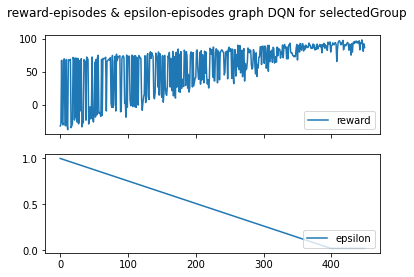

In [10]:
agent.plot_training_curve()

######################################
validating for  (32, 34.9238114, 40, 10, 30)
validating for (32, 34.9238114, 40, 10, 30)


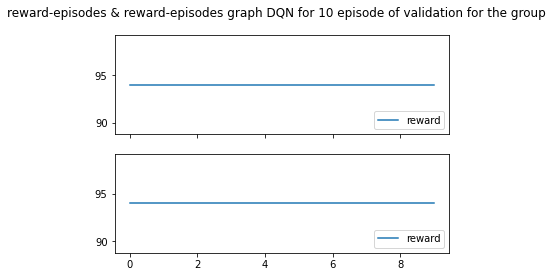

[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
(32, 1, 2)
(16.0, 1.0, 8.0)
#########################################
######################################
validating for  (32, 34.9238114, 40, 10, 40)
validating for (32, 34.9238114, 40, 10, 40)


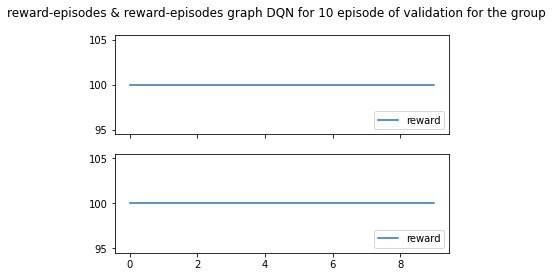

[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
(16, 1, 8)
(16.0, 1.0, 8.0)
#########################################


In [11]:
for i in range(0,2):
    print("######################################")
    print("validating for ", fileData_chameleon.group_keys[i])
    environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[i])
    env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
    env_validation.reset()
    reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
    reward_epsilon_values=[]
    reward_epsilon_values.append(reward_per_episode_validation)
    reward_epsilon_values.append(reward_per_episode_validation)
    labels = ["reward", "reward"]
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
    for i,ax in enumerate(axs):
        axs[i].plot(reward_epsilon_values[i],label=labels[i])
        axs[i].legend(loc="lower right")
    plt.show()
    print(action_list_per_episode[5])
    print(environmentG1.action_list[action_list_per_episode[0][0]])
    print(env_validation.max_throughput_parameters)
    print("#########################################")

In [14]:
from dqnAgent import *
import time
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:8],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:8])
env.reset()
agent=DQNAgent(env,EPSILON_DECAY=800000)
t = time.time()
agent.warming_replay_buffer()
print(f"warming up time is {time.time()- t} seconds")
t = time.time()
agent.training(TRAINING_STEPS=1000000)
print(f"training up time is {time.time()- t} seconds")

warming up memory
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
warming up time is 1.3678970336914062 seconds

step 0
Avg Rew 0.0
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 1000
Avg Rew -35.889532937939606
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 2000
Avg Rew -35.67967667255008
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 3000
Avg Rew -35.8579713242252
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 4000
Avg Rew -31.411343448426212
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode e

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 48000
Avg Rew -22.85023471485751
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 49000
Avg Rew -20.972174860601545
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 50000
Avg Rew -21.99870921127053
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 51000
Avg Rew -22.91709006152969
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 52000
Avg Rew -22.40581258187622
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 53000
Avg Rew -22.697926091981135
episode en

episode ends
episode ends
episode ends

step 96000
Avg Rew -21.680611281541946
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 97000
Avg Rew -20.739815716252824
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 98000
Avg Rew -18.876218871397484
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 99000
Avg Rew -17.763988830871813
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 100000
Avg Rew -17.666040450196462
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 101000
Avg Rew -16.776940023218202
episode ends
episode ends
episode ends
episode ends
episode ends
epis

episode ends
episode ends

step 144000
Avg Rew -13.91489477743444
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 145000
Avg Rew -14.084584124114414
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 146000
Avg Rew -14.772206082955833
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 147000
Avg Rew -14.126196978972384
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 148000
Avg Rew -14.188341841165817
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 149000
Avg Rew -13.622053710387124
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
e

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 193000
Avg Rew -5.401077336658432
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 194000
Avg Rew -5.520204740283085
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 195000
Avg Rew -4.435259243363631
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 196000
Avg Rew -2.8638100672821336
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 197000
Avg Rew -4.495352118668422
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 198000
Avg Re

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 241000
Avg Rew -2.2006814172779587
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 242000
Avg Rew -2.243887827779905
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 243000
Avg Rew -1.8809289383249532
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 244000
Avg Rew -1.7183143564770529
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 245000
Avg Rew -1.436165768919465
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 246000
Avg Rew -1.846475

episode ends
episode ends
episode ends
episode ends

step 289000
Avg Rew 2.4260328429226927
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 290000
Avg Rew 3.1608713460938342
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 291000
Avg Rew 3.9624553255376695
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 292000
Avg Rew 3.3304974533866174
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 293000
Avg Rew 4.134434074450868
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 294000
Avg Rew 5.369443514628643
episode ends
episode ends
episode ends
episode ends
episode 

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 338000
Avg Rew 7.876653368886332
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 339000
Avg Rew 8.786219732002547
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 340000
Avg Rew 8.267520899954002
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 341000
Avg Rew 8.166396895848731
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 342000
Avg Rew 8.506099716546448
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 343000
Avg Rew 8.42

episode ends
episode ends
episode ends
episode ends

step 386000
Avg Rew 14.780480143468658
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 387000
Avg Rew 15.134508506922966
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 388000
Avg Rew 15.43940245900333
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 389000
Avg Rew 16.01631452096647
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 390000
Avg Rew 17.144728120121478
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 391000
Avg Rew 16.6445009848864
episode ends
episode ends
episode ends
episode ends
episode en

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 435000
Avg Rew 19.696899571587494
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 436000
Avg Rew 19.99466270568774
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 437000
Avg Rew 20.008520126798814
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 438000
Avg Rew 19.792427779120004
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 439000
Avg Rew 19.411954926679993
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 440000
Avg Rew 

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 483000
Avg Rew 29.126106831336003
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 484000
Avg Rew 28.61947782453918
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 485000
Avg Rew 27.347818360841917
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 486000
Avg Rew 26.22181168424139
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 487000
Avg Rew 27.08016405387228
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 488000
Avg Rew 26.457581550353076
episode ends
episode ends
episode e

episode ends

step 531000
Avg Rew 33.05404213739018
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 532000
Avg Rew 32.48890596644013
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 533000
Avg Rew 32.65928007946409
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 534000
Avg Rew 31.878954202239562
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 535000
Avg Rew 30.673201507993877
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 536000
Avg Rew 31.45326734957046
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode en

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 580000
Avg Rew 35.39059688029503
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 581000
Avg Rew 34.700695676963946
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 582000
Avg Rew 35.475064093365035
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 583000
Avg Rew 34.786060414274445
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 584000
Avg Rew 36.89412067306579
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 585000
Avg Rew 37.73770041675

episode ends
episode ends
episode ends

step 628000
Avg Rew 39.607200061045
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 629000
Avg Rew 41.38310157325438
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 630000
Avg Rew 40.92807577700848
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 631000
Avg Rew 41.40568243742203
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 632000
Avg Rew 41.514004503702616
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 633000
Avg Rew 40.76557486905544
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends


episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 677000
Avg Rew 42.238617083936326
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 678000
Avg Rew 43.397749427185
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 679000
Avg Rew 44.37567406187802
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 680000
Avg Rew 44.096708158992676
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 681000
Avg Rew 44.82721395826451
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 682000
Avg Rew 44.5

episode ends
episode ends
episode ends
episode ends

step 725000
Avg Rew 49.80060783918383
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 726000
Avg Rew 49.982275679418116
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 727000
Avg Rew 46.828794702870844
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 728000
Avg Rew 46.646558486780876
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 729000
Avg Rew 47.7432730705628
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 730000
Avg Rew 49.2670834145644
episode ends
episode ends
episode ends
episode ends
episode end

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 774000
Avg Rew 49.73794702936481
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 775000
Avg Rew 49.38093007580021
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 776000
Avg Rew 52.150955280052685
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 777000
Avg Rew 49.792815238644344
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 778000
Avg Rew 51.64474118261488
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 779000
Avg Rew 51

episode ends
episode ends
episode ends
episode ends
episode ends

step 822000
Avg Rew 55.48663320859431
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 823000
Avg Rew 53.62898158495909
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 824000
Avg Rew 54.209868787043725
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 825000
Avg Rew 55.61725657985066
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 826000
Avg Rew 58.42691174443945
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 827000
Avg Rew 59.02123676929176
episode ends
episode ends
episode ends
episode end

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 871000
Avg Rew 49.89493398429092
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 872000
Avg Rew 52.36010153080653
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 873000
Avg Rew 53.27437902690157
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 874000
Avg Rew 52.88818709525656
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 875000
Avg Rew 54.41929760506364
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 876000
Avg Rew 53.2

episode ends
episode ends
episode ends
episode ends

step 919000
Avg Rew 60.68521989948687
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 920000
Avg Rew 57.068660325269605
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 921000
Avg Rew 58.55569704249493
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 922000
Avg Rew 58.49764919024758
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 923000
Avg Rew 58.03563339089497
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 924000
Avg Rew 56.486141575340525
episode ends
episode ends
episode ends
episode ends
episode en

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 968000
Avg Rew 52.129275907316966
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 969000
Avg Rew 51.581787813605835
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 970000
Avg Rew 50.00602920199222
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 971000
Avg Rew 49.93167661594218
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 972000
Avg Rew 50.85698748392556
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 973000
Avg Rew 51

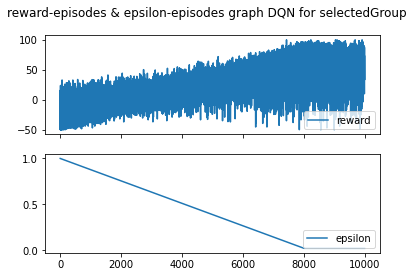

In [15]:
agent.plot_training_curve()

######################################
validating for  (32, 34.9238114, 40, 10, 30)
validating for (32, 34.9238114, 40, 10, 30)


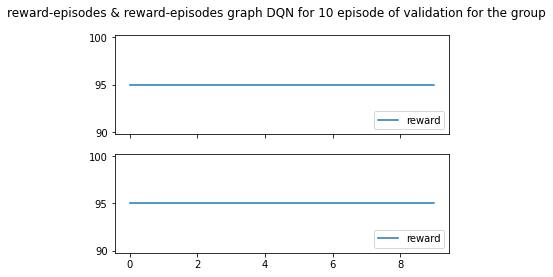

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
(16, 1, 16)
(16.0, 1.0, 8.0)
#########################################
######################################
validating for  (32, 34.9238114, 40, 10, 40)
validating for (32, 34.9238114, 40, 10, 40)


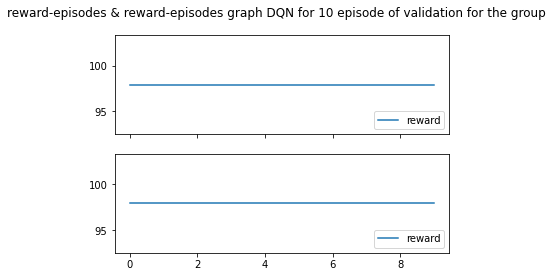

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
(16, 1, 16)
(16.0, 1.0, 8.0)
#########################################
######################################
validating for  (32, 34.9238114, 40, 10, 50)
validating for (32, 34.9238114, 40, 10, 50)


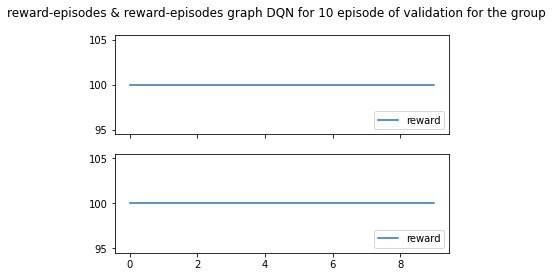

[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
(32, 1, 16)
(32.0, 1.0, 16.0)
#########################################
######################################
validating for  (32, 222.6392977, 40, 10, 30)
validating for (32, 222.6392977, 40, 10, 30)


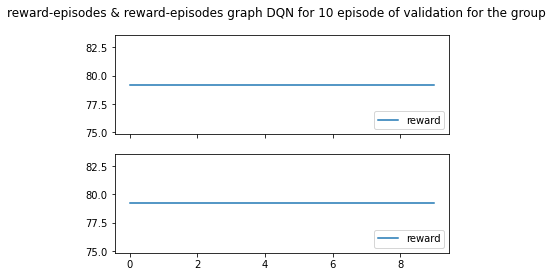

[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
(3, 1, 19)
(19.0, 1.0, 19.0)
#########################################
######################################
validating for  (32, 222.6392977, 40, 10, 40)
validating for (32, 222.6392977, 40, 10, 40)


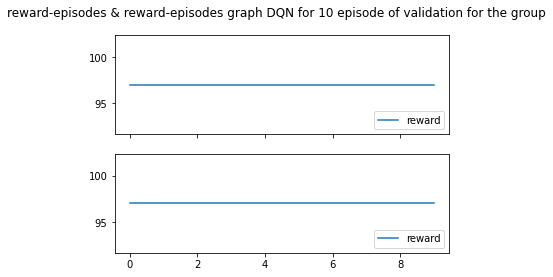

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
(9, 1, 31)
(9.0, 1.0, 9.0)
#########################################
######################################
validating for  (32, 222.6392977, 40, 10, 50)
validating for (32, 222.6392977, 40, 10, 50)


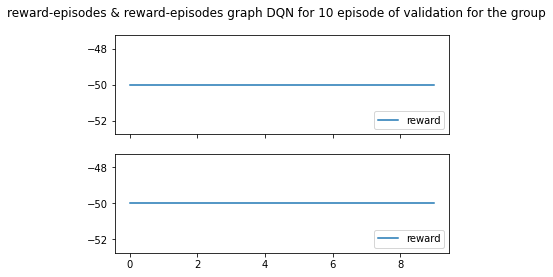

[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]
(19, 1, 9)
(9.0, 1.0, 19.0)
#########################################
######################################
validating for  (32, 222.6392977, 40, 10, 60)
validating for (32, 222.6392977, 40, 10, 60)


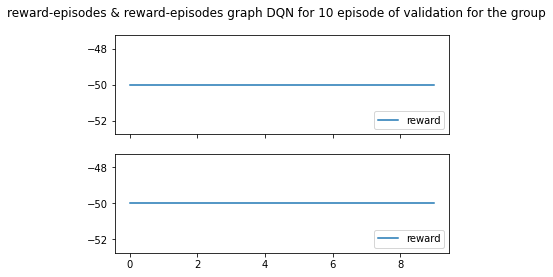

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]
(5, 1, 19)
(9.0, 1.0, 19.0)
#########################################
######################################
validating for  (32, 222.64, 40, 10, 30)
validating for (32, 222.64, 40, 10, 30)


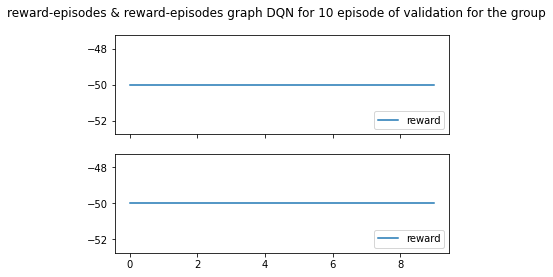

[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
(3, 1, 19)
(28.0, 1.0, 8.0)
#########################################


In [16]:
for i in range(0,8):
    print("######################################")
    print("validating for ", fileData_chameleon.group_keys[i])
    environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[i])
    env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
    env_validation.reset()
    reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
    reward_epsilon_values=[]
    reward_epsilon_values.append(reward_per_episode_validation)
    reward_epsilon_values.append(reward_per_episode_validation)
    labels = ["reward", "reward"]
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
    for i,ax in enumerate(axs):
        axs[i].plot(reward_epsilon_values[i],label=labels[i])
        axs[i].legend(loc="lower right")
    plt.show()
    print(action_list_per_episode[5])
    print(environmentG1.action_list[action_list_per_episode[0][0]])
    print(env_validation.max_throughput_parameters)
    print("#########################################")

In [32]:
from dqnAgent import *
import time
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[5:8],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[5:8])
env.reset()
agent=DQNAgent(env,EPSILON_DECAY=800000)
t = time.time()
agent.warming_replay_buffer()
print(f"warming up time is {time.time()- t} seconds")
t = time.time()
agent.training(TRAINING_STEPS=1000000)
print(f"training up time is {time.time()- t} seconds")

warming up memory
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
warming up time is 1.954308271408081 seconds

step 0
Avg Rew 0.0
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 1000
Avg Rew -12.702859003068868
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 2000
Avg Rew -7.698510874482912
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 3000
Avg Rew -13.435707386865243
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 4000
Avg Rew -10.435770371485349
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode 

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 48000
Avg Rew -4.890994586631365
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 49000
Avg Rew -5.702565850966771
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 50000
Avg Rew -3.1424848798795186
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 51000
Avg Rew -0.9098885958662631
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 52000
Avg Rew 1.2705030191994784
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 53000
Avg Rew -1.5374624878265917
episode e

episode ends
episode ends

step 96000
Avg Rew -8.671360897640717
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 97000
Avg Rew -8.76768552090834
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 98000
Avg Rew -7.573386558745421
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 99000
Avg Rew -9.23788148726467
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 100000
Avg Rew -5.542628601321633
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 101000
Avg Rew -5.69248248983283
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends


episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 145000
Avg Rew 4.67325922147405
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 146000
Avg Rew 1.3592945607480462
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 147000
Avg Rew 2.3895030994136475
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 148000
Avg Rew -1.2494142776215384
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 149000
Avg Rew -1.1736213843718892
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 150000
Avg Rew 0.4477215374

episode ends
episode ends
episode ends

step 193000
Avg Rew 7.4966020100209025
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 194000
Avg Rew 11.971566017345326
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 195000
Avg Rew 8.9614363665547
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 196000
Avg Rew 6.762672279893655
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 197000
Avg Rew 8.407878729072461
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 198000
Avg Rew 8.508567637723466
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 242000
Avg Rew 16.720163789987026
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 243000
Avg Rew 17.60742105282787
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 244000
Avg Rew 14.790710439513644
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 245000
Avg Rew 17.068484321503608
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 246000
Avg Rew 13.35416393693695
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 247000
Avg Rew 1

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 290000
Avg Rew 24.389859648729452
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 291000
Avg Rew 23.713735319886354
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 292000
Avg Rew 24.375926920667165
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 293000
Avg Rew 23.665539855823944
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 294000
Avg Rew 24.22638613117048
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 295000
Avg Rew 24.9722037460258
episode ends
episode ends
episode e

episode ends

step 338000
Avg Rew 25.675165882988505
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 339000
Avg Rew 26.170777257666042
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 340000
Avg Rew 27.581895377807726
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 341000
Avg Rew 29.446408985483785
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 342000
Avg Rew 30.661180492448413
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 343000
Avg Rew 29.542546157604615
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episod

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 387000
Avg Rew 32.41471514819796
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 388000
Avg Rew 30.32536284237422
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 389000
Avg Rew 28.98544782365886
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 390000
Avg Rew 31.594827369731497
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 391000
Avg Rew 30.915334534213358
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 392000
Avg Rew 30

episode ends
episode ends
episode ends
episode ends

step 435000
Avg Rew 36.77038066845243
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 436000
Avg Rew 35.82206972786863
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 437000
Avg Rew 36.37939604537675
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 438000
Avg Rew 36.23149340685464
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 439000
Avg Rew 37.928544568857376
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 440000
Avg Rew 35.824612510990214
episode ends
episode ends
episode ends
episode ends
episode en

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 484000
Avg Rew 44.39832598330495
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 485000
Avg Rew 44.65745470470515
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 486000
Avg Rew 43.26182511899404
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 487000
Avg Rew 42.94459814737937
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 488000
Avg Rew 42.19282940750899
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 489000
Avg Rew 40.7

episode ends
episode ends
episode ends
episode ends
episode ends

step 532000
Avg Rew 41.674962469523635
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 533000
Avg Rew 41.84547572667783
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 534000
Avg Rew 43.19234866625213
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 535000
Avg Rew 41.89907256019988
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 536000
Avg Rew 41.89736503222895
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 537000
Avg Rew 42.157289244165725
episode ends
episode ends
episode ends
episode en

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 581000
Avg Rew 52.072519621386625
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 582000
Avg Rew 52.55447411440632
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 583000
Avg Rew 51.68652348423984
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 584000
Avg Rew 51.41326511426277
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 585000
Avg Rew 50.967614620031426
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 586000
Avg Rew 50

episode ends
episode ends
episode ends
episode ends

step 629000
Avg Rew 53.48707922600913
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 630000
Avg Rew 53.72023738946751
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 631000
Avg Rew 54.24328434939932
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 632000
Avg Rew 54.87702748831921
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 633000
Avg Rew 55.56278832077072
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 634000
Avg Rew 55.09123554899426
episode ends
episode ends
episode ends
episode ends
episode ends

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 678000
Avg Rew 58.98768053687871
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 679000
Avg Rew 58.77075298706164
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 680000
Avg Rew 58.7029828306545
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 681000
Avg Rew 60.53362885402822
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 682000
Avg Rew 60.39142784907556
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 683000
Avg Rew 61.08

episode ends
episode ends
episode ends
episode ends

step 726000
Avg Rew 60.70570605025454
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 727000
Avg Rew 62.13276489691828
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 728000
Avg Rew 63.0732359112813
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 729000
Avg Rew 63.948936626422025
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 730000
Avg Rew 63.68722878068602
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 731000
Avg Rew 63.57237161296388
episode ends
episode ends
episode ends
episode ends
episode ends

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 775000
Avg Rew 61.84868731856055
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 776000
Avg Rew 61.27131810545821
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 777000
Avg Rew 60.854116013687346
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 778000
Avg Rew 61.9276158049926
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 779000
Avg Rew 61.61526509993771
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 780000
Avg Rew 62.4

episode ends
episode ends
episode ends

step 823000
Avg Rew 71.92317605843753
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 824000
Avg Rew 70.13344376360114
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 825000
Avg Rew 70.14129881998414
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 826000
Avg Rew 67.90033331074083
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 827000
Avg Rew 68.41734723159638
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 828000
Avg Rew 68.04765404988959
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 872000
Avg Rew 69.89486075493127
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 873000
Avg Rew 68.0267268055962
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 874000
Avg Rew 67.87404115278389
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 875000
Avg Rew 67.05032278287004
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 876000
Avg Rew 67.84450548040502
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 877000
Avg Rew 66.28383404261376


episode ends
episode ends

step 920000
Avg Rew 68.24070456083115
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 921000
Avg Rew 68.038006333482
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 922000
Avg Rew 68.16649853652318
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 923000
Avg Rew 67.66600233836047
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 924000
Avg Rew 66.13513998365579
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 925000
Avg Rew 65.42681477623941
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
e

episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 969000
Avg Rew 66.35194471359861
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 970000
Avg Rew 66.45001609151757
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 971000
Avg Rew 65.8162488506468
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 972000
Avg Rew 66.50552853515845
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 973000
Avg Rew 67.31698756403553
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends
episode ends

step 974000
Avg Rew 67.54815705707375
episode ends


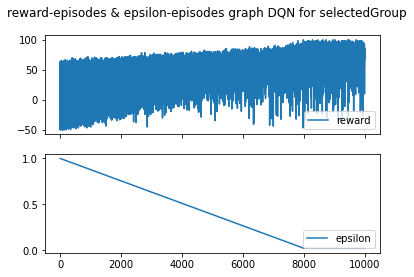

In [33]:
agent.plot_training_curve()

######################################
validating for  (32, 222.6392977, 40, 10, 50)
validating for (32, 222.6392977, 40, 10, 50)


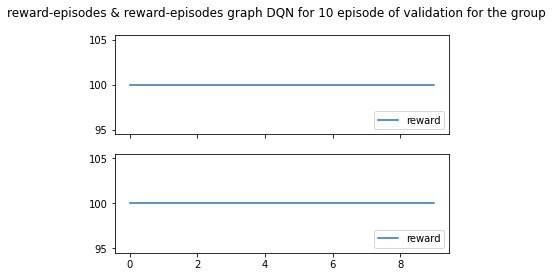

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(9, 1, 19)
(9.0, 1.0, 19.0)
#########################################
######################################
validating for  (32, 222.6392977, 40, 10, 60)
validating for (32, 222.6392977, 40, 10, 60)


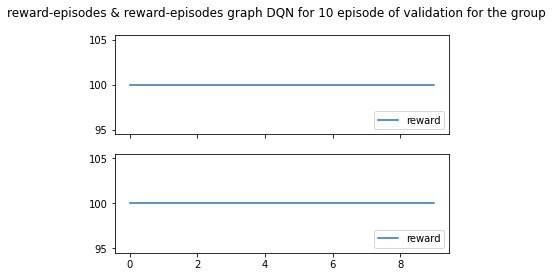

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(9, 1, 19)
(9.0, 1.0, 19.0)
#########################################
######################################
validating for  (32, 222.64, 40, 10, 30)
validating for (32, 222.64, 40, 10, 30)


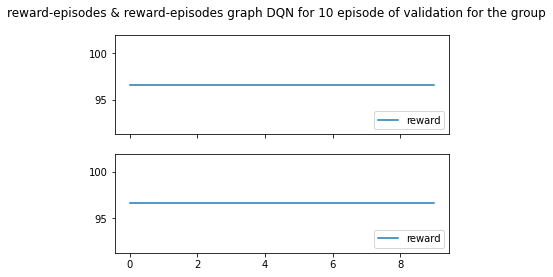

[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]
(28, 1, 1)
(28.0, 1.0, 8.0)
#########################################


In [36]:
for i in range(5,8):
    print("######################################")
    print("validating for ", fileData_chameleon.group_keys[i])
    environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[i])
    env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
    env_validation.reset()
    reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
    reward_epsilon_values=[]
    reward_epsilon_values.append(reward_per_episode_validation)
    reward_epsilon_values.append(reward_per_episode_validation)
    labels = ["reward", "reward"]
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
    for i,ax in enumerate(axs):
        axs[i].plot(reward_epsilon_values[i],label=labels[i])
        axs[i].legend(loc="lower right")
    plt.show()
    print(action_list_per_episode[5])
    print(environmentG1.action_list[action_list_per_episode[0][0]])
    print(env_validation.max_throughput_parameters)
    print("#########################################")

In [35]:
class NetEnvironmentValidation(gym.Env):
    metadata = {'render.modes': []}
    def __init__(self, environment_group,global_action_list):
            self.environment_group = environment_group
            self.states = environment_group.return_state_list()
            self.actions = global_action_list
            self.max_throughput = environment_group.group_maximum_throughput()
            self.max_throughput_parameters=environment_group.return_group_max_throughput_parameters()
            self.environment_group_identification=environment_group.return_group_identification()
            self.observation_space = spaces.Box(low=0, high=np.inf, shape=(8,), dtype=np.float32)
            self.action_space = spaces.Discrete(len(self.actions))
            self.max_timesteps = MAX_TIMESTEPS
            self.time = 0
            self.b = -0.5
            self.prev_throughput = -1.
            self.current_observation = np.asarray(self.states[0])
            self.obs_shape=(8,)

    def reset(self):
        self.time = 0
        self.prev_throughput = -1
        self.current_observation = self.states[0]
        return np.asarray(self.current_observation)

    def step(self, action):
#         print(action)
        action = self.actions[action]
#         print(action)
        try:
#             print("try")
            throughputs = self.environment_group.return_group_key_throughput(action)
#             print("failed")
            cur_throughput = max(throughputs)
            reward = cur_throughput / self.max_throughput
            self.prev_throughput = cur_throughput
            self.current_observation[-3:] = action

        except:
            reward = self.b
            self.current_observation= self.current_observation

        self.time += 1
        if self.max_timesteps <= self.time:
            done = True
        else:
            done = False
        info = {'time': self.time, 'max_time': self.max_timesteps}
        return np.asarray(self.current_observation), reward, done, info

    def get_actions(self):
        return self.actions

    def get_states(self):
        return self.states

    def get_max_throughput(self):
        return self.max_throughput

    def get_time(self):
        return self.time

    def render(self):
        pass


In [21]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[5])
print(environmentG1Validation.action_list)
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
print(env_validation.step(15))

[(9, 1, 19), (9, 1, 31), (31, 1, 3), (31, 1, 9)]
15
(4, 1, 8)
try
(array([ 32.       , 222.6392977,  40.       ,  10.       ,  50.       ,
         9.       ,   1.       ,  19.       ]), -0.5, False, {'time': 1, 'max_time': 100})


######################################
validating for  (32, 222.64, 40, 10, 30)
validating for (32, 222.64, 40, 10, 30)
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
tr

51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 19)
try
51
(3, 1, 

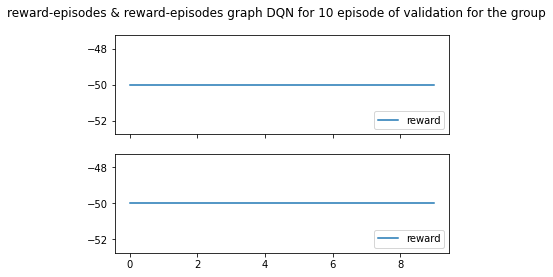

[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
(3, 1, 19)
(28.0, 1.0, 8.0)
#########################################


In [31]:
for i in range(7,8):
    print("######################################")
    print("validating for ", fileData_chameleon.group_keys[i])
    environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[i])
    env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
    env_validation.reset()
    reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
    reward_epsilon_values=[]
    reward_epsilon_values.append(reward_per_episode_validation)
    reward_epsilon_values.append(reward_per_episode_validation)
    labels = ["reward", "reward"]
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
    for i,ax in enumerate(axs):
        axs[i].plot(reward_epsilon_values[i],label=labels[i])
        axs[i].legend(loc="lower right")
    plt.show()
    print(action_list_per_episode[5])
    print(environmentG1.action_list[action_list_per_episode[0][0]])
    print(env_validation.max_throughput_parameters)
    print("#########################################")

In [23]:
print(action_list_per_episode[6])

[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68]


In [24]:
environmentG1.action_list[action_list_per_episode[0][0]]

(19, 1, 9)

In [25]:
env_validation.max_throughput_parameters

(9.0, 1.0, 19.0)

validating for (32, 34.9238114, 40, 10, 40)


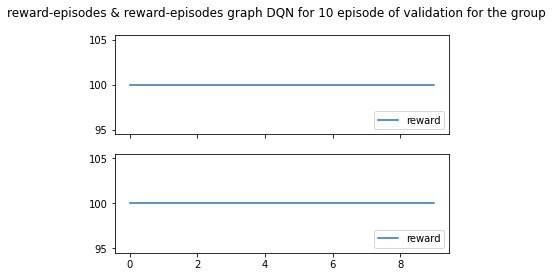

In [31]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[1])
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()


In [32]:
print(action_list_per_episode[0])

[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]


In [33]:
environmentG1.action_list[action_list_per_episode[0][0]]

(16, 1, 8)

In [34]:
env_validation.max_throughput_parameters

(16.0, 1.0, 8.0)

In [35]:
env_validation.max_throughput

7955.841507

In [ ]:
from dqnAgent import *
import time
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0:5],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[0:5])
env.reset()
agent=DQNAgent(env,EPSILON_DECAY=400000)
t = time.time()
agent.warming_replay_buffer()
print(f"warming up time is {time.time()- t} seconds")
t = time.time()
agent.training(TRAINING_STEPS=1000000)
print(f"training up time is {time.time()- t} seconds")

In [ ]:
agent.plot_training_curve()



In [ ]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[0])
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()



In [ ]:
action_list_per_episode

In [ ]:
print(environmentG1.action_list[21])
print(env_validation.max_throughput_parameters)

In [ ]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[1])
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()
print(action_list_per_episode)



In [ ]:
print(environmentG1.action_list[33])
print(env_validation.max_throughput_parameters)

In [ ]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[2])
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()
action_list_per_episode


In [ ]:

print(environmentG1.action_list[34])
print(env_validation.max_throughput_parameters)

In [ ]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[3])
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()
action_list_per_episode



In [ ]:

print(environmentG1.action_list[59])
print(env_validation.max_throughput_parameters)

In [ ]:
environmentG1Validation=environmentGroupValidation(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[4])
env_validation=NetEnvironmentValidation(environmentG1Validation,environmentG1.action_list)
env_validation.reset()
reward_per_episode_validation,action_list_per_episode=validation(agent,env_validation)
reward_epsilon_values=[]
reward_epsilon_values.append(reward_per_episode_validation)
reward_epsilon_values.append(reward_per_episode_validation)
labels = ["reward", "reward"]
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('reward-episodes & reward-episodes graph DQN for 10 episode of validation for the group')
for i,ax in enumerate(axs):
    axs[i].plot(reward_epsilon_values[i],label=labels[i])
    axs[i].legend(loc="lower right")
plt.show()
action_list_per_episode




In [ ]:
print(environmentG1.action_list[56])
print(env_validation.max_throughput_parameters)